In [1]:
import json

# Load the data from the JSON file
with open('tokenizedFine_500.json', 'r') as file:
    fixed_sampled_stories = json.load(file)

In [2]:
# Explore the Data
print("Total number of stories:", len(fixed_sampled_stories))
print("Sample story:", fixed_sampled_stories[0])

Total number of stories: 500
Sample story: bengaluru infosys solid foundation grow back large deal bagged fiscal year ended march nonexecutive chairman nandan nilekani large deal valued billion year net new deal promise solid foundation grow build resilience month come nilekani wednesday annual general meeting india second largest company virtual address shareholder bengalurubased firm capability harness opportunity despite dynamic time inflation interest rate geopolitics war demand volatility supply chain dislocation tremendous infosys projected revenue growth lowest six year ongoing fiscal rival hcltech tata consultancy service expected kick result season july infosys report result july indian firm bracing tough year amid macro headwind tightening discretionary spending client regional banking crisis u hampered sentiment banking financial service vertical draw nearly sector total revenue client attention changing chief executive salil parekh overall demand environment changed global 

In [3]:
import json
import pandas as pd

# Load the preprocessed sample stories
with open ('tokenizedFine_500.json', 'r') as file:
    preproccessed_stories = json.load(file)
    
# Convert to DataFrame for convenience
df = pd.DataFrame(preproccessed_stories)

print(df.head())

                                                   0
0  bengaluru infosys solid foundation grow back l...
1  december staff american writer artist institut...
2  bengaluru genz prioritizes professional growth...
3  new technology upend many online business comp...
4  share u tech giant buzzing fund scorching perf...


##### Extract Entities from Text

In [4]:
import json
import pandas as pd
import spacy

# Load the spaCy NER model
nlp = spacy.load('en_core_web_sm')

# Function to extract entities from text using spaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Load the tokenized data
input_file_path = 'tokenizedFine_500.json'  # Replace with your actual file path
with open(input_file_path, 'r') as file:
    tokenized_data = json.load(file)

# Convert the tokenized data to a DataFrame
df = pd.DataFrame(tokenized_data, columns=['text'])

# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Print the first 10 rows of the DataFrame
print(df.head(10))


                                                text  \
0  bengaluru infosys solid foundation grow back l...   
1  december staff american writer artist institut...   
2  bengaluru genz prioritizes professional growth...   
3  new technology upend many online business comp...   
4  share u tech giant buzzing fund scorching perf...   
5  every tuesday friday ezra klein invite convers...   
6  door shut andrew return mark andrew raven star...   
7  doha mekki one president biden key antitrust e...   
8  general election campaign begin earnest expect...   
9  reddit social medium news aggregation platform...   

                                            entities  
0  [(bengaluru infosys solid foundation, ORG), (f...  
1  [(december, DATE), (american, NORP), (chicago,...  
2  [(bengaluru, ORG), (one, CARDINAL), (nine, CAR...  
3  [(san francisco, GPE), (early december, DATE),...  
4  [(last year, DATE), (month, DATE), (year, DATE...  
5  [(friday, DATE), (ezra klein, PERSON), (today,... 

In [5]:
# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Check the extracted entities
print("Sample of 'entities' column:")
print(df['entities'].head())

# Verify that entities are extracted correctly
for i, row in df.iterrows():
    print(f"Story {i}:")
    print(row['entities'])
    print()

Sample of 'entities' column:
0    [(bengaluru infosys solid foundation, ORG), (f...
1    [(december, DATE), (american, NORP), (chicago,...
2    [(bengaluru, ORG), (one, CARDINAL), (nine, CAR...
3    [(san francisco, GPE), (early december, DATE),...
4    [(last year, DATE), (month, DATE), (year, DATE...
Name: entities, dtype: object
Story 0:
[('bengaluru infosys solid foundation', 'ORG'), ('fiscal year ended march', 'DATE'), ('nandan nilekani', 'PERSON'), ('billion year', 'DATE'), ('month', 'DATE'), ('wednesday', 'DATE'), ('annual', 'DATE'), ('india', 'GPE'), ('second', 'ORDINAL'), ('six year', 'DATE'), ('hcltech tata', 'ORG'), ('july', 'DATE'), ('july', 'DATE'), ('indian', 'NORP'), ('year', 'DATE'), ('infosys cent', 'ORG'), ('billion', 'CARDINAL'), ('last month', 'DATE'), ('kumar', 'PERSON'), ('last year', 'DATE'), ('year', 'DATE'), ('june', 'DATE')]

Story 1:
[('december', 'DATE'), ('american', 'NORP'), ('chicago', 'GPE'), ('early february', 'DATE'), ('polish', 'NORP'), ('many busines

In [6]:
# Filter entities based on selected types
selected_entity_types = ['ORG', 'PERSON', 'GPE']

def filter_entities(entities, selected_types):
    # Ensure entities is a list of tuples
    if not isinstance(entities, list):
        return []
    return [entity[0] for entity in entities if isinstance(entity, tuple) and len(entity) == 2 and entity[1] in selected_types]

# Apply filtering to extract selected entities
df['selected_entities'] = df['entities'].apply(lambda x: filter_entities(x, selected_entity_types))

# Check the filtered entities
print("Sample of 'selected_entities' column:")
print(df['selected_entities'].head())

# Verify that filtering works correctly
for i, row in df.iterrows():
    print(f"Story {i} selected entities:")
    print(row['selected_entities'])
    print()

Sample of 'selected_entities' column:
0    [bengaluru infosys solid foundation, nandan ni...
1    [chicago, michael chui, white house, guillermo...
2    [bengaluru, india, prativa mohapatra, india, e...
3    [san francisco, google, erik brynjolfsson, sta...
4    [fed, fed, srivastava head, chipmaker nvidia c...
Name: selected_entities, dtype: object
Story 0 selected entities:
['bengaluru infosys solid foundation', 'nandan nilekani', 'india', 'hcltech tata', 'infosys cent', 'kumar']

Story 1 selected entities:
['chicago', 'michael chui', 'white house', 'guillermo rubio', 'orange county', 'massachusetts institute technology', 'github owned', 'microsoft', 'github researcher', 'david', 'peter dolkens', 'london', 'new jersey', 'guillermo rubio', 'new york']

Story 2 selected entities:
['bengaluru', 'india', 'prativa mohapatra', 'india', 'edtech', 'kumar', 'mathur consulting', 'india']

Story 3 selected entities:
['san francisco', 'google', 'erik brynjolfsson', 'stanford institute artificial

Sample of flattened selected entities list:
['bengaluru infosys solid foundation', 'nandan nilekani', 'india', 'hcltech tata', 'infosys cent', 'kumar', 'chicago', 'michael chui', 'white house', 'guillermo rubio', 'orange county', 'massachusetts institute technology', 'github owned', 'microsoft', 'github researcher', 'david', 'peter dolkens', 'london', 'new jersey', 'guillermo rubio']
Entity frequencies:
microsoft        521
india            455
new york         323
google           274
china            266
washington        85
san francisco     84
sam altman        76
america           62
kevin             59
congress          58
california        58
japan             57
fed               56
united state      54
ibm               53
ezra klein        51
taiwan            50
white house       48
taylor            44
Name: count, dtype: int64


/var/folders/15/flznp7b90sd75nfgk99v3l3w0000gn/T/ipykernel_38299/4165666088.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')


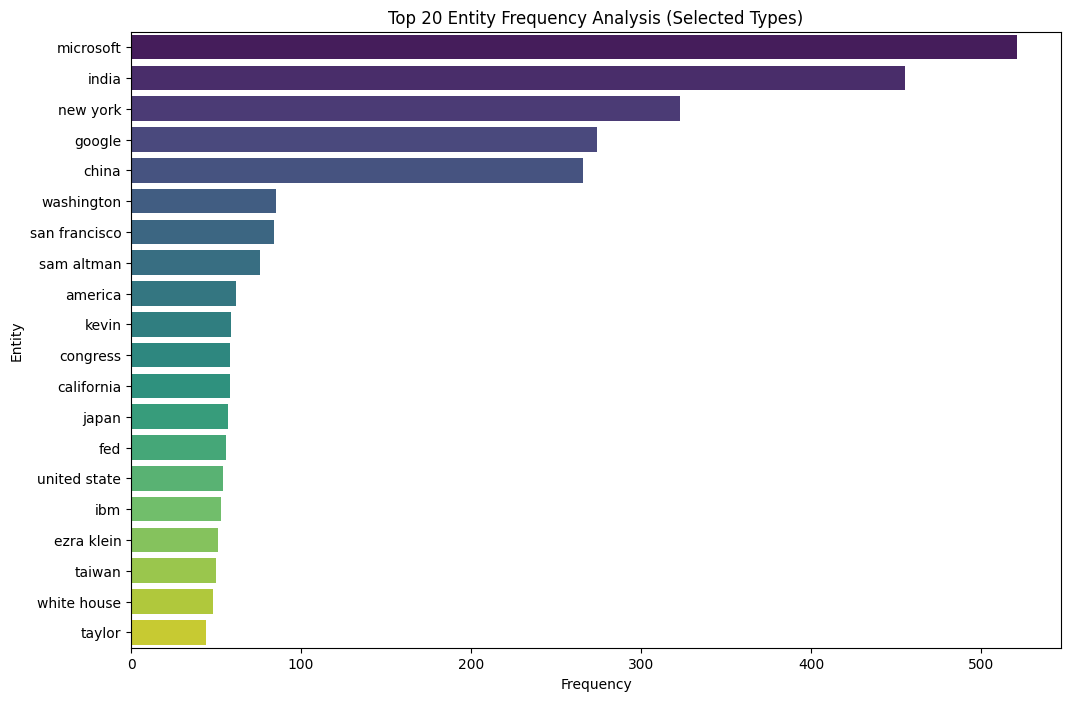

In [7]:
# Flatten the list of selected entities to calculate frequencies
all_selected_entities = [entity for sublist in df['selected_entities'] for entity in sublist]

# Check the flattened list of selected entities
print("Sample of flattened selected entities list:")
print(all_selected_entities[:20])

# Calculate frequency of selected entities
entity_freq = pd.Series(all_selected_entities).value_counts()

# Check the frequency of selected entities
print("Entity frequencies:")
print(entity_freq.head(20))

# Plot a bar chart of the top 20 entities
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.title('Top 20 Entity Frequency Analysis (Selected Types)')
plt.show()